<a href="https://colab.research.google.com/github/neerajviswajith/CE888/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 7s 5ms/step - loss: 0.4411 - accuracy: 0.8543 - val_loss: 0.0529 - val_accuracy: 0.9846
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0478 - val_accuracy: 0.9871
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0342 - accuracy: 0.9882 - val_loss: 0.0412 - val_accuracy: 0.9884
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0643 - val_accuracy: 0.9850
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0199 - accuracy: 0.9927 - val_loss: 0.0409 - val_accuracy: 0.9899


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9909


0.9908999800682068

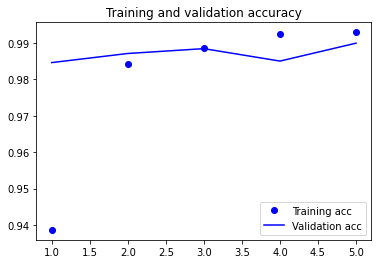

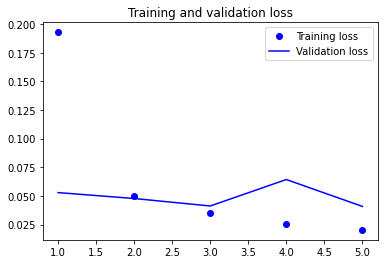

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

## CNN + GridSearch For Optimal Performance
#### Data Import and Pre-processing

In [9]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, Adadelta

In [10]:
#Fetching Data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
# Changing the Data Shape

X_train, X_test = X_train.astype('float32') /255, X_test.astype('float32') /255
X_train, X_test = np.expand_dims(X_train, -1), np.expand_dims(X_test,-1)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

#### Function For ConvNet

In [12]:
# Building funtion for model

def CNN_model(act_funct='relu',opt=RMSprop,learning_rate=0.001,momentum=0.0, dropout_rate=0.0):
  #Input
  i = Input(shape=(X_train[0].shape))

  #Convolution layers
  o = Conv2D(32, (3,3), activation=act_funct)(i)
  o = MaxPooling2D((2,2))(o)
  o = Conv2D(64, (3,3), activation=act_funct)(o)
  o = MaxPooling2D((2,2))(o)
  o = Conv2D(64, (3,3), activation=act_funct)(o)

  #Dense Layer
  o = Flatten()(o)
  o = Dropout(dropout_rate)(o)
  o = Dense(64, activation=act_funct)(o)
  o = Dense(10, activation='softmax')(o)

  clf = Model(i,o)

  #Compiling Model
  clf.compile(optimizer=opt(learning_rate,momentum),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return clf

## Setting Up and Fitting GridSearch

In [13]:
# Initialising Parameters, Keras Classifier and GridSearch CV

act_funct = ['relu',tf.keras.layers.LeakyReLU()]
opt = [Adam, Adagrad, RMSprop, Adadelta]
learning_rate = [0.0001,0.001, 0.01, 0.1]
momentum = [0.0,0.5,0.9,0.99]
dropout_rate = [0.0,0.25,0.5]

param_grid = dict(act_funct=act_funct,opt=opt,learning_rate=learning_rate,momentum=momentum,dropout_rate=dropout_rate)
Classifier = KerasClassifier(build_fn=CNN_model,epochs=5, batch_size=64, validation_split=0.2)

grid = GridSearchCV(estimator=Classifier,param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.5632 - accuracy: 0.8146 - val_loss: 0.0710 - val_accuracy: 0.9778
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0727 - accuracy: 0.9769 - val_loss: 0.0561 - val_accuracy: 0.9843
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0532 - accuracy: 0.9846 - val_loss: 0.0472 - val_accuracy: 0.9876
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0494 - val_accuracy: 0.9868
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.0387 - val_accuracy: 0.9890


In [14]:
# Summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988617 using {'act_funct': 'relu', 'dropout_rate': 0.25, 'learning_rate': 0.001, 'momentum': 0.5, 'opt': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>}
0.972150 (0.002561) with: {'act_funct': 'relu', 'dropout_rate': 0.0, 'learning_rate': 0.0001, 'momentum': 0.0, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>}
0.758100 (0.028663) with: {'act_funct': 'relu', 'dropout_rate': 0.0, 'learning_rate': 0.0001, 'momentum': 0.0, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>}
0.963267 (0.002883) with: {'act_funct': 'relu', 'dropout_rate': 0.0, 'learning_rate': 0.0001, 'momentum': 0.0, 'opt': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>}
0.173650 (0.044682) with: {'act_funct': 'relu', 'dropout_rate': 0.0, 'learning_rate': 0.0001, 'momentum': 0.0, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adadelta.Adadelta'>}
0.971650 (0.002443) with: {'act_funct': 'relu', 'dropout_rate': 0.0, 'learning_rate': 0.0001, 'mome

In [15]:
# Checking performance with optimal parameters

optmodel = CNN_model(**grid_result.best_params_)
optmodel.fit(X_train,y_train, epochs=5, batch_size=64, validation_split=0.2)
optmodel.save('opt_cnn.h5')

Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.5635 - accuracy: 0.8194 - val_loss: 0.0743 - val_accuracy: 0.9783
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0764 - accuracy: 0.9756 - val_loss: 0.0523 - val_accuracy: 0.9863
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0572 - accuracy: 0.9835 - val_loss: 0.0479 - val_accuracy: 0.9876
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.0571 - val_accuracy: 0.9873
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0748 - val_accuracy: 0.9838


In [16]:
t_loss, t_acc,= optmodel.evaluate(X_test, y_test)
print(f'Accuracy: {round(t_acc*100,2)}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9864
Accuracy: 98.64%
